In [ ]:
#Importing Required Libraries to Work on
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Mounting The Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Impoting Dataset from Drive Using Pandas read_csv function
Data = pd.read_csv("/content/drive/MyDrive/DAV_ES/DATASET/DataSet.csv",encoding="latin1")


In [ ]:
#Displaying the Head 10 records and Tail 10 Records of the Data Being taken
display(Data.head(10),Data.tail(10))

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57,91.2,"18,812",11.8,34%,46:54:00,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46:54:00,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50:50:00,2011
8,9,Imperial College London,United Kingdom,89.2,90,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50:50:00,2011


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2593,601-800,University of West Bohemia,Czech Republic,16.3,23.1,9.7,29.8,32.1,-,"15,639",21.5,2%,52:48:00,2016
2594,601-800,University of the West of England,United Kingdom,16.9,48.5,11.2,34.6,28.5,-,"22,525",21.4,15%,53:47:00,2016
2595,601-800,West University of Timiï¿½ï¿½,Romania,16.1,21,3.9,22.4,-,-,"12,933",19.0,3%,62:38:00,2016
2596,601-800,University of Westminster,United Kingdom,17.3,81.9,11.7,21.1,28.5,-,"16,609",21.0,43%,57:43:00,2016
2597,601-800,Xidian University,China,17.9,12.8,12.1,8.9,83.7,-,"31,618",16.4,2%,29 : 71,2016
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48:52:00,2016
2599,601-800,Yï¿½ï¿½ldï¿½ï¿½z Technical Un,Turkey,14.5,14.9,7.6,19.3,44,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,"8,663",20.6,4%,43:57:00,2016


In [ ]:
#Understanding Dataset and Attributes Present in it
Column_Names=Data.columns
for ele in Column_Names:
  print(ele,":::",ele.upper())

world_rank ::: WORLD_RANK
university_name ::: UNIVERSITY_NAME
country ::: COUNTRY
teaching ::: TEACHING
international ::: INTERNATIONAL
research ::: RESEARCH
citations ::: CITATIONS
income ::: INCOME
total_score ::: TOTAL_SCORE
num_students ::: NUM_STUDENTS
student_staff_ratio ::: STUDENT_STAFF_RATIO
international_students ::: INTERNATIONAL_STUDENTS
female_male_ratio ::: FEMALE_MALE_RATIO
year ::: YEAR


In [ ]:
#Knowing How lengthy the Dataset is
Length_Pre=len(Data)
print("Length of the Dataset is :",Length_Pre,"Entries.")
#Missing Values Handling
Data1=Data.dropna()
len(Data1)
print("Total Missing Records in the Data-Set are : ",Length_Pre-len(Data1),"Entries.")

Length of the Dataset is : 2603 Entries.
Total Missing Records in the Data-Set are :  241 Entries.


In [ ]:
#Let us First Find Out How Many Institutions are Ranked Among the Length of Data from Each Country
Data_Copy=pd.DataFrame(Data[["country","university_name"]])
Data_Country_Wise=Data_Copy.groupby("country")
Data_Country_Wise=Data_Country_Wise.count()
Data_Country_Wise=Data_Country_Wise.rename(columns={"university_name":"COUNT"})

In [ ]:
#Displaying the Header Data And Ending Data of Data_Country_Wise
#Sort the DataFrame by the count of universities in descending order
Data_Country_Wise = Data_Country_Wise.sort_values(by="COUNT", ascending=False)
Data_Country_Wise=pd.DataFrame(Data_Country_Wise)
display(Data_Country_Wise)


,COUNT
country,
United States of America,659
United Kingdom,300
Germany,152
Australia,117
Canada,108
...,...
Ghana,1
Cyprus,1
Belarus,1


In [ ]:
#Processing the X-axis from Data-Frame
Indices=Data_Country_Wise.index
X_axis=[]
for ele in Indices:
  X_axis.append(ele)

In [ ]:
# Assuming your DataFrame is named Data_Country_Wise
Y_axis = Data_Country_Wise['COUNT'].tolist()

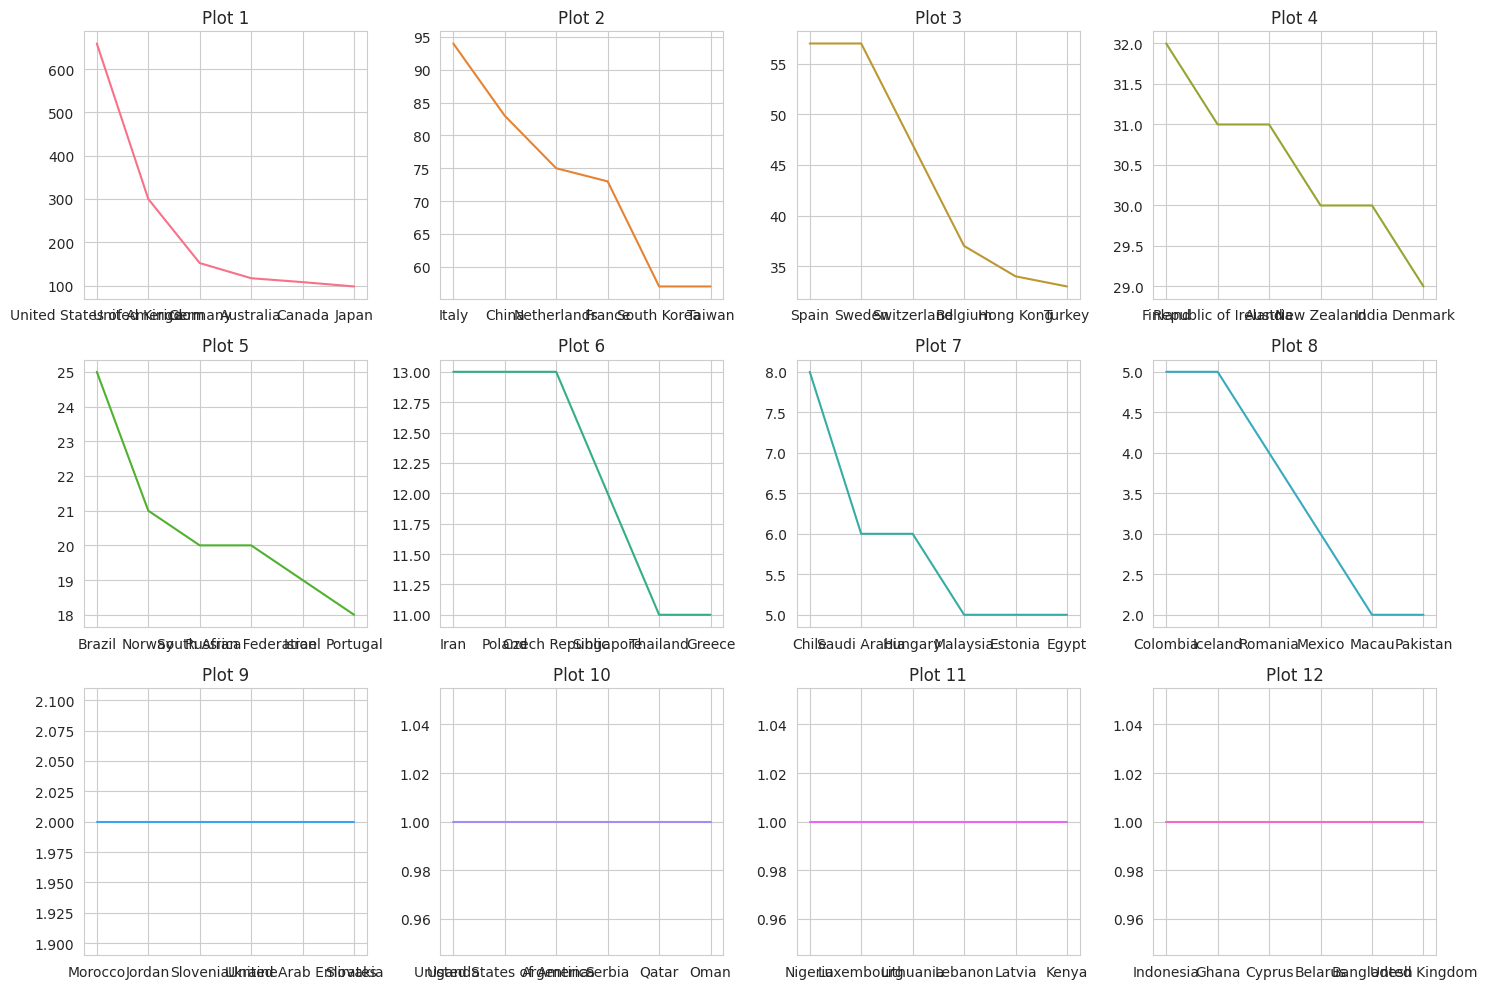

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")


# Assuming X_axis and Y_axis contain the data for plotting

# Create subplots with 3 rows and 4 columns
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Choose a Seaborn color palette for the plots
colors = sns.color_palette("husl", n_colors=12)

# Iterate over the data and plot each subset in a separate subplot
for i in range(12):
    ax = axes[i]
    sns.lineplot(x=X_axis[i*6:(i+1)*6], y=Y_axis[i*6:(i+1)*6], ax=ax, color=colors[i])
    ax.set_title(f'Plot {i+1}')  # Set title for each subplot

plt.tight_layout()
plt.show()


In [ ]:
'''The describe() function in pandas is used to generate descriptive statistics that summarize
 the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.
  It provides a quick overview of the numerical attributes of the DataFrame.'''

#Describing Data
data=Data.copy()

#Data Pre-Processing
data.drop(["country","university_name","female_male_ratio"],axis=1, inplace=True)
data.replace("-", np.nan, inplace=True)
data=data.dropna()

data['teaching'] = data['teaching'].astype(float)
data['research'] = data['research'].astype(float)
data['citations'] = data['citations'].astype(float)
data['total_score'] = data['total_score'].astype(float)
data['num_students'] = data['num_students'].str.replace(',', '').astype(int)
data['student_staff_ratio'] = data['student_staff_ratio'].astype(float)
data['international_students'] = data['international_students'].str.replace('%', '').astype(float)
data['year'] = data['year'].astype(float)


# Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis (EDA):")
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())



Exploratory Data Analysis (EDA):

Summary Statistics:
          teaching     research    citations  total_score   num_students  \
count  1039.000000  1039.000000  1039.000000  1039.000000    1039.000000   
mean     50.022329    51.998268    76.894321    59.655342   23560.570741   
std      16.967471    19.583979    15.608267    12.747370   13312.111095   
min      15.900000    13.100000     8.600000    41.400000     462.000000   
25%      37.700000    36.900000    66.650000    50.200000   14260.000000   
50%      46.400000    48.100000    78.700000    55.800000   22064.000000   
75%      59.350000    64.650000    89.100000    65.900000   30144.000000   
max      99.700000    99.400000   100.000000    96.100000  127431.000000   

       student_staff_ratio  international_students         year  
count          1039.000000             1039.000000  1039.000000  
mean             15.901732               20.132820  2013.668912  
std               8.683927               10.383294     1.67035


Correlation Matrix:


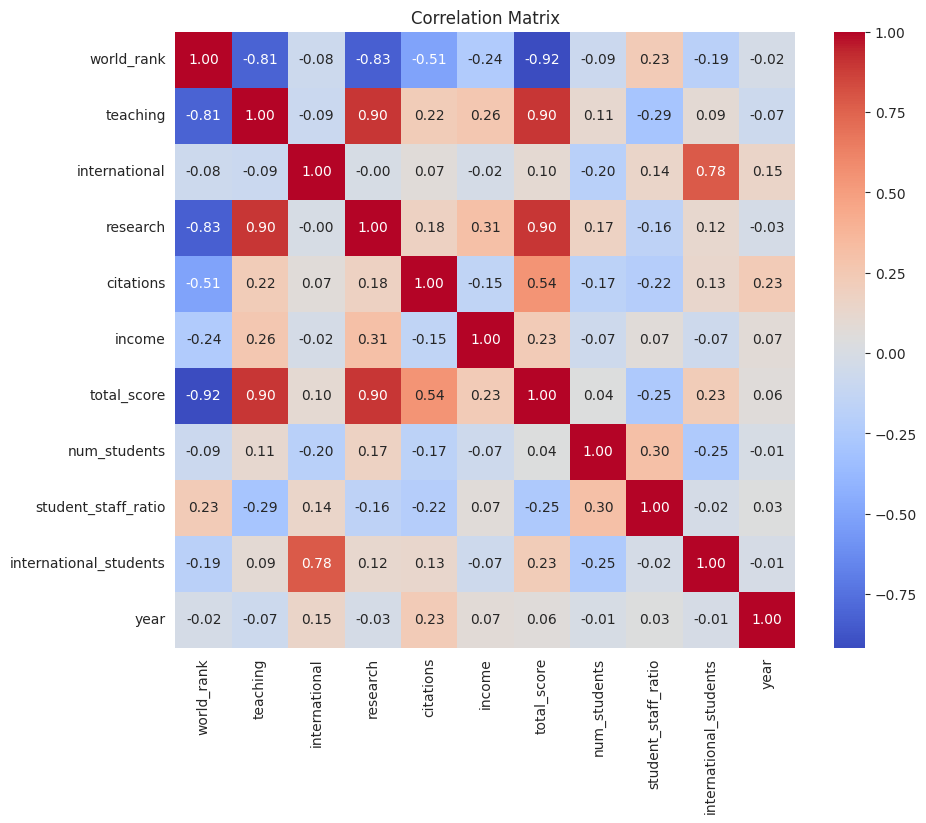

In [ ]:
'''A correlation matrix is a table showing correlation coefficients between variables. Each
 cell in the table shows the correlation between two variables. The value is in the range of
  -1 to 1. If two variables have a correlation close to 1, it means they have a strong positive
   correlation, whereas a correlation close to -1 indicates a strong negative correlation.
    A correlation near 0 means the variables are not linearly correlated.'''
'''The describe() function in pandas is used to generate descriptive statistics that summarize
 the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.
  It provides a quick overview of the numerical attributes of the DataFrame.'''

#Initialising Data
data=Data.copy()

#Data Pre-Processing
data.drop(["country","university_name","female_male_ratio"],axis=1, inplace=True)
data.replace("-", np.nan, inplace=True)
data=data.dropna()

data['teaching'] = data['teaching'].astype(float)
data['research'] = data['research'].astype(float)
data['citations'] = data['citations'].astype(float)
data['total_score'] = data['total_score'].astype(float)
data['num_students'] = data['num_students'].str.replace(',', '').astype(int)
data['student_staff_ratio'] = data['student_staff_ratio'].astype(float)
data['international_students'] = data['international_students'].str.replace('%', '').astype(float)
data['year'] = data['year'].astype(float)

# Correlation matrix
print("\nCorrelation Matrix:")
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Distribution of Variables:


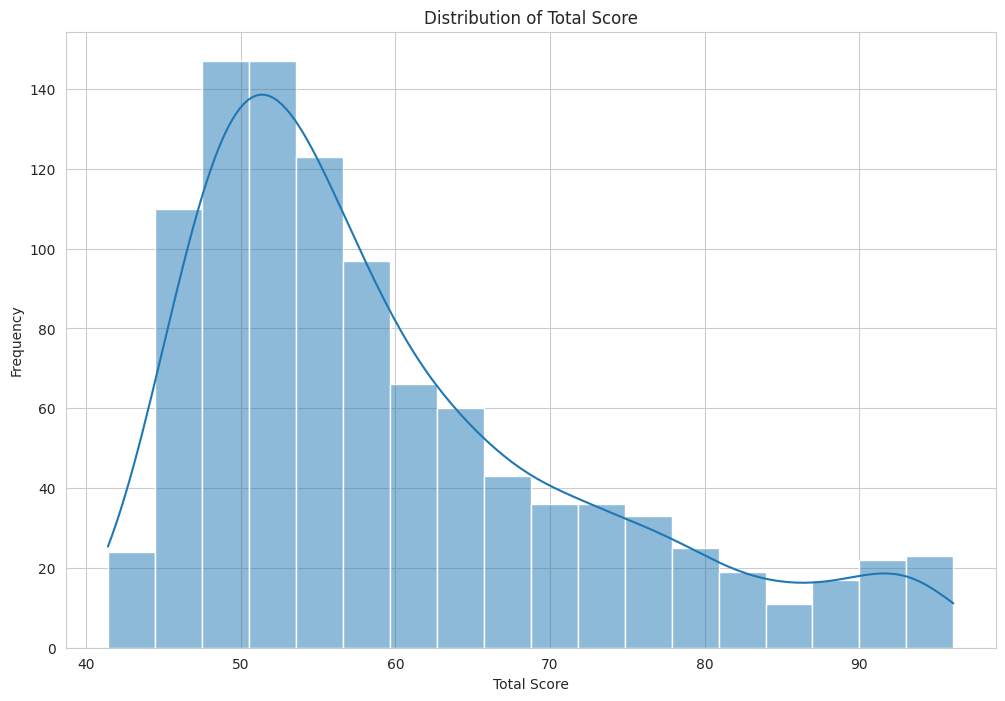

In [ ]:
#Initialising Data
data=Data.copy()

#Data Pre-Processing
data.drop(["country","university_name","female_male_ratio"],axis=1, inplace=True)
data.replace("-", np.nan, inplace=True)
data=data.dropna()

data['teaching'] = data['teaching'].astype(float)
data['research'] = data['research'].astype(float)
data['citations'] = data['citations'].astype(float)
data['total_score'] = data['total_score'].astype(float)
data['num_students'] = data['num_students'].str.replace(',', '').astype(int)
data['student_staff_ratio'] = data['student_staff_ratio'].astype(float)
data['international_students'] = data['international_students'].str.replace('%', '').astype(float)
data['year'] = data['year'].astype(float)

# Distribution of variables
print("\nDistribution of Variables:")
plt.figure(figsize=(12, 8))
sns.histplot(data['total_score'], kde=True)
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# Assuming 'world_rank' is the target variable
X = data.drop(['world_rank', 'year'], axis=1)
y = data['world_rank']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
print("\nModel Evaluation:")
# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Model Evaluation:
Accuracy: 0.04487179487179487


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.04487179487179487


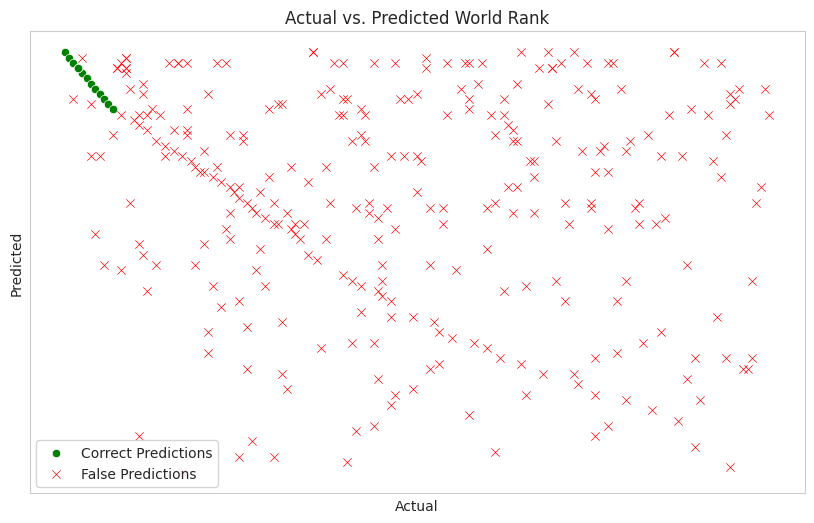

In [ ]:
# Assuming y_test and y_pred are already defined
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Determine if predictions are correct or false
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']


plt.figure(figsize=(10, 6))


# Plot correct predictions in green
sns.scatterplot(x='Actual', y='Predicted', data=results_df[results_df['Correct']], color="green", marker="o", label='Correct Predictions')

# Plot false predictions in red
sns.scatterplot(x='Actual', y='Predicted', data=results_df[~results_df['Correct']], color="red", marker="x", label='False Predictions')

plt.title('Actual vs. Predicted World Rank')
plt.xticks([])
plt.yticks([])

# Add legend
plt.legend()
plt.show()


In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Results Interpretation
print("\nResults Interpretation:")
# Interpretation of results based on the analysis performed and the model evaluation

# Reporting
print("\nReporting:")
# Presenting findings in a clear and understandable manner, often using visualizations and summaries
# Visualizations and summaries can be added as per the analysis results


Classification Report:
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
         100       0.00      0.00      0.00         1
         101       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         103       0.00      0.00      0.00         3
         104       0.00      0.00      0.00         2
         106       0.00      0.00      0.00         0
         107       0.00      0.00      0.00         2
         108       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         4
          11       1.00      1.00      1.00         1
         110       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         114       0.00      0.00      0.00         1
         115       0.00      0.00      0.00         2
         116       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.